# Load data + data cleaning

## Raw datasets

- **book_train.parquet** : données de carnet d’ordres (prix/quantités à l'achat/vente)

- **trade_train.parquet** : données de transactions (prix exécutés, volumes, etc.)

- **train.csv** : valeurs de volatilité cible (target)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

DATA_PATH = "/Users/helenerabain/Desktop/Volatility/Realized-Volatility-Prediction/raw_data/"

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747


In [14]:
book_sample = pd.read_parquet(os.path.join(DATA_PATH, "book_train.parquet"), engine="pyarrow")
book_sample.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100,0
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100,0
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100,0
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0


In [20]:
# Structure de book_train
book_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167253289 entries, 0 to 167253288
Data columns (total 11 columns):
 #   Column             Dtype   
---  ------             -----   
 0   time_id            int16   
 1   seconds_in_bucket  int16   
 2   bid_price1         float32 
 3   ask_price1         float32 
 4   bid_price2         float32 
 5   ask_price2         float32 
 6   bid_size1          int32   
 7   ask_size1          int32   
 8   bid_size2          int32   
 9   ask_size2          int32   
 10  stock_id           category
dtypes: category(1), float32(4), int16(2), int32(4)
memory usage: 5.8 GB


In [21]:
book_sample.describe()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
count,1.672533e+08,1.672533e+08,1.672533e+08,1.672533e+08,1.672533e+08,1.672533e+08,1.672533e+08,1.672533e+08,1.672533e+08,1.672533e+08
mean,1.602237e+04,2.969969e+02,9.997120e-01,1.000283e+00,9.995183e-01,1.000479e+00,9.285549e+02,9.233744e+02,1.181631e+03,1.146534e+03
std,9.370937e+03,1.734195e+02,3.811545e-03,3.810885e-03,3.821979e-03,3.820810e-03,5.782958e+03,5.263738e+03,7.168244e+03,6.121242e+03
min,5.000000e+00,0.000000e+00,8.807735e-01,8.876458e-01,8.806137e-01,8.898833e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.837000e+03,1.460000e+02,9.984497e-01,9.989405e-01,9.982569e-01,9.991112e-01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
50%,1.584500e+04,2.960000e+02,9.998062e-01,1.000211e+00,9.996397e-01,1.000380e+00,1.610000e+02,1.610000e+02,1.590000e+02,1.610000e+02
75%,2.395800e+04,4.470000e+02,1.001055e+00,1.001535e+00,1.000888e+00,1.001727e+00,4.000000e+02,3.970000e+02,5.000000e+02,5.000000e+02
max,3.276700e+04,5.990000e+02,1.125048e+00,1.127149e+00,1.124570e+00,1.127245e+00,1.051433e+06,6.462940e+05,9.801370e+05,8.501390e+05


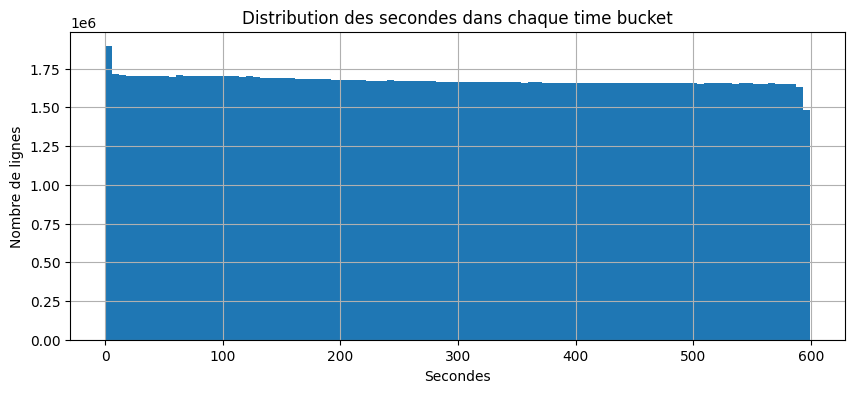

In [16]:
# Distribution des 'seconds_in_bucket'
book_sample['seconds_in_bucket'].hist(bins=100, figsize=(10, 4))
plt.title('Distribution des secondes dans chaque time bucket')
plt.xlabel('Secondes')
plt.ylabel('Nombre de lignes')
plt.show()


In [ ]:
# Vérifier les valeurs aberrantes (prix négatifs, tailles nulles, etc.)
for col in ['bid_price1', 'bid_price2', 'ask_price1', 'ask_price2']:
    print(f"{col} - min: {book_sample[col].min()}, max: {book_sample[col].max()}")


bid_price1 - min: 0.8807735443115234, max: 1.1250478029251099
bid_price2 - min: 0.8806136846542358, max: 1.1245701313018799
ask_price1 - min: 0.8876458406448364, max: 1.1271494626998901
ask_price2 - min: 0.8898833394050598, max: 1.1272449493408203


In [18]:
# Lecture du fichier 'trade_train.parquet'
trade_sample = pd.read_parquet(os.path.join(DATA_PATH, "trade_train.parquet"), engine="pyarrow")
trade_sample.head()


,time_id,seconds_in_bucket,price,size,order_count,stock_id
0,5,21,1.002301,326,12,0
1,5,46,1.002778,128,4,0
2,5,50,1.002818,55,1,0
3,5,57,1.003155,121,5,0
4,5,68,1.003646,4,1,0
